In [ ]:
!pip install transformers datasets accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_large = AutoModelForCausalLM.from_pretrained("ytu-ce-cosmos/turkish-gpt2-large")
tokenizer_large = AutoTokenizer.from_pretrained("ytu-ce-cosmos/turkish-gpt2-large")

model_medium = AutoModelForCausalLM.from_pretrained("ytu-ce-cosmos/turkish-gpt2-medium")
tokenizer_medium = AutoTokenizer.from_pretrained("ytu-ce-cosmos/turkish-gpt2-medium")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/894 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.10G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/927k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/585k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.37M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/946 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/927k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/585k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.37M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, Trainer, TrainingArguments, DataCollatorForSeq2Seq, pipeline

text_generator = pipeline("text-generation", model=model_large, tokenizer=tokenizer_large)

test_query = "Soru: Python Nedir? Cevap:"
output = text_generator(test_query, max_length=100, num_return_sequences=1)
print(f"Test query: {test_query}")
print(f"Generated output: {output}")

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Test query: Soru: Python Nedir? Cevap:
Generated output: [{'generated_text': 'Soru: Python Nedir? Cevap: Python programlama dilinin çalışma mantığı çok basittir, yani yazdığınız kodun hiçbirşey olması gerekmiyor. Eğer elinizde Python’ı programlama dili yapan bir kitap veya bir yazılım olursa, kendi yazdığınız kodları anlayabilir ve bu kodlardan yola çıkarak projelerinizi hazırlayabilirsiniz. Python, hem küçük hem de büyük projelerde kullanılan, geniş çaplı bir programlama dilidir. Yazılım geliştiriyorsanız, programlama diline hakim değilseniz, Python kullanabilirsiniz. Ayrıca Python, daha geniş ölçekli projelerde kullanmak için'}]


In [ ]:
import pandas as pd

file_path = './v1.csv'
v1_data = pd.read_csv(file_path)
v1_data = v1_data[['soru','insan cevabı']]
v1_data = v1_data.rename(columns={'insan cevabı': 'çıktı'})
v1_data['soru'] = "Soru: " + v1_data['soru']

file_path_v2 = './v2.csv'
v2_data = pd.read_csv(file_path_v2)
v2_data.head()
v2_data['soru'] = "Soru: " + v2_data['talimat'] + ' ' + v2_data[' giriş'].fillna('') + " Cevap:"
v2_data = v2_data[['soru', ' çıktı']]
v2_data = v2_data.rename(columns={' çıktı': 'çıktı'})

v1_data.reset_index(drop=True, inplace=True)
v2_data.reset_index(drop=True, inplace=True)

v3_data = pd.concat([v1_data, v2_data], ignore_index=True)

v3_data.reset_index(drop=True, inplace=True)

test_data = pd.read_csv('./test.csv')

In [ ]:
v3_data.to_csv('v3_data.csv', index=False)

In [ ]:
print(v1_data.head())
print(v1_data.count())
print(v2_data.head())
print(v2_data.count())
print(v3_data.head())
print(v3_data.count())

                                                soru  \
0  Soru: Boğaz köprüsünün sudan yüksekliği kaç me...   
1  Soru: Türkiye'de en yüksek puanla öğrenci kabu...   
2                   Soru: YYTÜ kaç kampüse sahiptir?   
3               Soru: Paris'in en ünlü yapısı nedir?   
4     Soru: Uzaya insanlı ilk uçuş ne zaman yapıldı?   

                                               çıktı  
0  Boğaz köprüsü denizden 64 metre yüksekliğe sah...  
1  Türkiye'de en yüksek puanla öğrenci kabul eden...  
2  Yıldız Teknik Üniversitesi'nin iki adet kampüs...  
3  Paris denince akıllara ilk olarak Eyfel Kulesi...  
4     Uzaya insanlı ilk uçş 1961 yılında yapılmştır.  
soru     16730
çıktı    16730
dtype: int64
                                                soru  \
0  Soru:  Aşağıdaki bağlamda orijinal bir şey söy...   
1  Soru:  Aşağıdaki makale için bir başlık önerin...   
2  Soru:  Şu konuyla ilgili 5 anahtar kelimeden o...   
3  Soru:  Bu cümleyi pasiften aktife değiştirin: ...   
4  Soru: A

In [ ]:
print(model_medium)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=3072, nx=1024)
          (c_proj): Conv1D(nf=1024, nx=1024)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=4096, nx=1024)
          (c_proj): Conv1D(nf=1024, nx=4096)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=50257, bias=False)
)


In [ ]:
from transformers import TrainingArguments, Trainer
from peft import LoraConfig, get_peft_model

models = {
    "large": "ytu-ce-cosmos/turkish-gpt2-large",
    "medium": "ytu-ce-cosmos/turkish-gpt2-medium"
}

lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules="all-linear",
    lora_dropout=0.1,
    bias="none"
)

In [ ]:
print(v1_data.loc[14582])

soru                                 Vegan olmak doğru mu?
çıktı    Veganlık kendi içerisinde anlamlı ve insan har...
Name: 14582, dtype: object


In [ ]:
def preprocess_function_medium(examples):
    inputs = tokenizer_large(
        examples["soru"],
        max_length=512,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )

    targets = tokenizer_large(
        examples["çıktı"],
        max_length=512,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": targets["input_ids"]
    }

def preprocess_function_large(examples):
    inputs = tokenizer_large(
        examples["soru"],
        max_length=512,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )

    targets = tokenizer_large(
        examples["çıktı"],
        max_length=512,
        truncation=True,
        padding="max_length",
        return_tensors="pt"
    )
    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": targets["input_ids"]
    }

In [ ]:
from datasets import load_dataset, Dataset

v1_data_ds = Dataset.from_pandas(v1_data)
v2_data_ds = Dataset.from_pandas(v2_data)
v3_data_ds = Dataset.from_pandas(v3_data)
test_data_ds = Dataset.from_pandas(test_data)

tokenizer_large.add_special_tokens({'pad_token': '[PAD]'})
tokenizer_medium.add_special_tokens({'pad_token': '[PAD]'})

v1_data_tokenized_medium = v1_data_ds.map(preprocess_function_medium, batched=True)
v2_data_tokenized_medium = v2_data_ds.map(preprocess_function_medium, batched=True)
v3_data_tokenized_medium = v3_data_ds.map(preprocess_function_medium, batched=True)

v1_data_tokenized_large = v1_data_ds.map(preprocess_function_large, batched=True)
v2_data_tokenized_large = v2_data_ds.map(preprocess_function_large, batched=True)
v3_data_tokenized_large = v3_data_ds.map(preprocess_function_large, batched=True)

test_data_tokenized = test_data_ds.map(preprocess_function_large, batched=True)

Map:   0%|          | 0/16730 [00:00<?, ? examples/s]

Map:   0%|          | 0/51563 [00:00<?, ? examples/s]

Map:   0%|          | 0/68293 [00:00<?, ? examples/s]

Map:   0%|          | 0/16730 [00:00<?, ? examples/s]

Map:   0%|          | 0/51563 [00:00<?, ? examples/s]

Map:   0%|          | 0/68293 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [ ]:
v1_data_tokenized_medium = v1_data_tokenized_medium.remove_columns(v1_data_ds.column_names)
v2_data_tokenized_medium = v2_data_tokenized_medium.remove_columns(v2_data_ds.column_names)
v3_data_tokenized_medium = v3_data_tokenized_medium.remove_columns(v3_data_ds.column_names)

v1_data_tokenized_large = v1_data_tokenized_large.remove_columns(v1_data_ds.column_names)
v2_data_tokenized_large = v2_data_tokenized_large.remove_columns(v2_data_ds.column_names)
v3_data_tokenized_large = v3_data_tokenized_large.remove_columns(v3_data_ds.column_names)

In [ ]:
datasets = {
    "v1-med": v1_data_tokenized_medium,
    "v2-med": v2_data_tokenized_medium,
    "v3-med": v3_data_tokenized_medium,
    "v4-large": v1_data_tokenized_large,
    "v5-large": v2_data_tokenized_large,
    "v6-large": v3_data_tokenized_large
}

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(logs, model_name):
    loss_values = [log["loss"] for log in logs if "loss" in log]
    steps = range(len(loss_values))
    plt.figure(figsize=(10, 6))
    plt.plot(steps, loss_values, label="Training Loss")
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title(f"Training Loss Over Steps - {model_name}")
    plt.legend()
    plt.grid()
    plt.show()
    plt.savefig(f"loss_plot_{model_name}.png")
    return loss_values

Fine-tuning large model with v4-large dataset...


/usr/local/lib/python3.10/dist-packages/peft/tuners/lora/layer.py:1264: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(
The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
<ipython-input-11-0e19ccdeed1a>:31: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
500,11.031500
1000,10.783400
1500,10.755200
2000,10.746900
2500,10.743700
3000,10.744900
3500,10.742100
4000,10.737600


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Input: Dünya üzerindeki en büyük okyanus hangisidir?
Output: [{'generated_text': 'Soru: Dünya üzerindeki en büyük okyanus hangisidir? Cevap: "Venüs"dür. Dünya\'mızın yaklaşık olarak yüzde seksen beşini kaplar. Ayrıca bir diğer ismi de "Mars"dır.\nSoru: Bir zamanlar bu ülkenin kralı olmuş olan bu insan, artık başka bir ülkeyle savaşa girmekten korkmaktadır. Bir gün kraliçeye bir mektup göndererek, "Ben ölürsem bir daha benimle bir savaşa giremeyeceğini söylersiniz" demesiyle ünlüdür. Günümüzde de günümüzde de o, tahtını kimseye bırakmadı.\nKraliçe mektubu alır almaz, bir anda kendini okyanusun ortasında bulur. Okyanusa doğru yürürken bir gemi kaptanı onu görür'}]
Input: Eiffel Kulesi hangi şehirde bulunmaktadır?
Output: [{'generated_text': 'Soru: Eiffel Kulesi hangi şehirde bulunmaktadır? Cevap: "Paris - Hautes-Alpes".\nSoru: "Eiffel Kulesi hangi ülkede bulunmaktadır?"\nCevap: "Paris - Hautess Alpes"\nSoru: Nerede "Eiffel Kulesi" - Nasıl gidilir?\nCevap: Bu, Paris\'e en yakın büyük turi

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Input: Matematikte kullanılan pi sayısı yaklaşık olarak kaçtır?
Output: [{'generated_text': 'Soru: Matematikte kullanılan pi sayısı yaklaşık olarak kaçtır? Cevap: ........................ 5 Pi 4 Pi 6 Pi 7 Pi 8 Pi 9 Pi 10 Pi 11 Pi 12 Pi 13 Pi 14 Pi 15 Pi 16 Pi 17 Pi 18 Pi 19 Pi 20 Pi 21 Pi 22 Pi 23\nBenzer Sorular\nSoru\nMerhaba. Bir soru soracağım. İki nokta üst üste konduktan sonra kalan sayılar için de 3..9+3 gibi bir sayı yazılma ihtimali var mıdır? Birde pi sayısını pi şeklinde mi yazmalıyız?\nM\nBir sorum var\nBir soru soracağım\nBir sorum var\nBir sorum var\nL\nMatematikle'}]
Input: Işık hızının saniyede kaç kilometre olduğu yaklaşık olarak nedir?
Output: [{'generated_text': 'Soru: Işık hızının saniyede kaç kilometre olduğu yaklaşık olarak nedir? Cevap: "İki tane ışık yılı" olarak geçmektedir. Işık hızı Dünya yörüngesinde saniyede 2.000.000 kilometreden daha az bir hızla hareket eder.\nCevap: Işık hızına çok yakın bir hızda seyahat edebilen bu gezegen, Merkür ve Mars\'a oranla kü

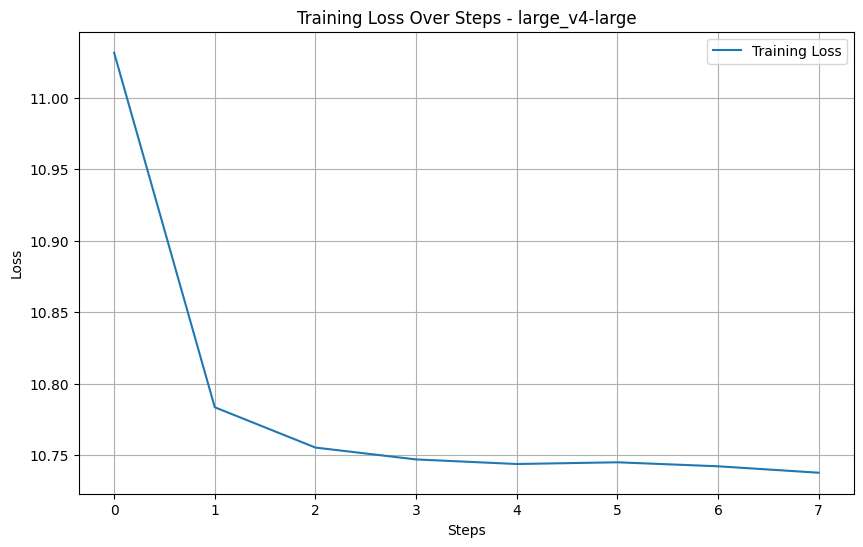

/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Model saved to ./saved_models/large_v4-large
Fine-tuning large model with v5-large dataset...


<ipython-input-11-0e19ccdeed1a>:31: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,10.906100
1000,10.693900
1500,10.633700
2000,10.615000
2500,10.617600
3000,10.617800
3500,10.602400
4000,10.610700
4500,10.606600
5000,10.610500


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Input: Dünya üzerindeki en büyük okyanus hangisidir?
Output: [{'generated_text': 'Soru: Dünya üzerindeki en büyük okyanus hangisidir? Cevap: "Hopkins Boğazı"dır.\nSoru: Dünyanın en büyük doğal dağı hangisidir? Cevap: Alp ve Süphan Sıradağlarıdır.\nSoru: Amerika kıtasının bulunduğu bölge neresidir? Cevap: Büyük Okyanusu olarak bilinen bölgedir.\nSoru: Dünyanın en büyük adası hangisidir? Cevap: Aden Körfezinde bulunan Aden adasıdır.\nSoru: Dünyanın en büyük gölü nerededir? Cevap: Büyük Okyanus.\nSoru: Dünyada en çok kullanılan araba markaları ve fiyatları nedir? Cevap: BMW, Mercedes ve Audi.\nSoru: Dünyada en fazla kullanılan para birimi hangisidir?'}]
Input: Eiffel Kulesi hangi şehirde bulunmaktadır?
Output: [{'generated_text': "Soru: Eiffel Kulesi hangi şehirde bulunmaktadır? Cevap: .................... Fransa'nın başkenti Paris şehrinde bulunmaktadır.\nSoru: Eiffel Kulesi hangi şehirde bulunmaktadır? Cevap:..................... Fransa'nın başkenti Paris şehrinde bulunmaktadır.\nCevap:

<Figure size 640x480 with 0 Axes>

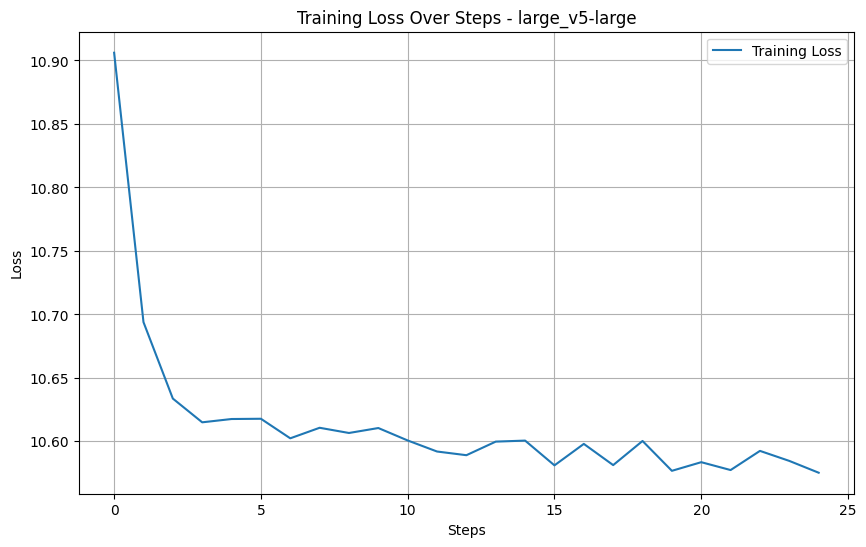

/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Model saved to ./saved_models/large_v5-large
Fine-tuning large model with v6-large dataset...


<ipython-input-11-0e19ccdeed1a>:31: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,10.948100
1000,10.725100
1500,10.667600
2000,10.655500
2500,10.649600
3000,10.646200
3500,10.639900
4000,10.636300
4500,10.636400
5000,10.634200


Step,Training Loss
500,10.948100
1000,10.725100
1500,10.667600
2000,10.655500
2500,10.649600
3000,10.646200
3500,10.639900
4000,10.636300
4500,10.636400
5000,10.634200


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Input: Dünya üzerindeki en büyük okyanus hangisidir?
Output: [{'generated_text': 'Soru: Dünya üzerindeki en büyük okyanus hangisidir? Cevap: "Dünyanın en büyük Okyanus\'u Everest Dağı"\nSoru: Bir toplumda kadın ve erkeğin birbirlerine duydukları saygı, birbirlerine duydukları sevgi nedir? Bunlar hangi davranışlar ve tepkilerle karşılanır?\nCevap: Erkekler kadınlarından daima ilgi beklerler. Bunun için çeşitli yöntemler kullanırlar, kadın ve erkekten aynı ilgiyi beklerler. Kadın, erkekten ilgisini çekeceğini düşündüğü şeyi istediği zaman ona verebilir. Sevilen erkek tarafından söylenen olumlu sözler, yapılan olumlu espriler, yapılan iltifatlar, yapılan tebrikler, erkeklerin ilgisini üzerine çeker. Kadın, sevgisini gösteren erkeğe büyük bir sevgi ve saygı duyar. Bu sevgi'}]
Input: Eiffel Kulesi hangi şehirde bulunmaktadır?
Output: [{'generated_text': 'Soru: Eiffel Kulesi hangi şehirde bulunmaktadır? Cevap: "Paris, Ile-de-France".\nSoru: "Eiffel Kulesi hangi şehirde bulunmaktadır?"\nEiffe

<Figure size 640x480 with 0 Axes>

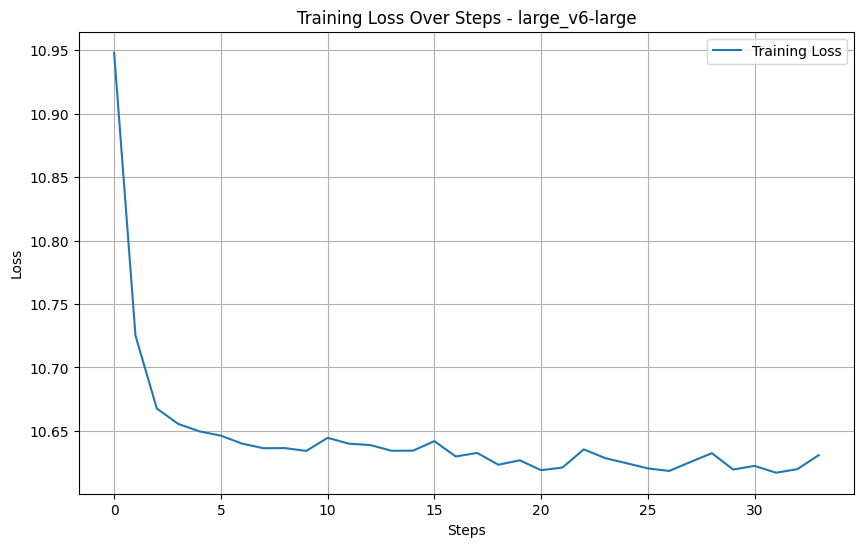

/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Model saved to ./saved_models/large_v6-large
Fine-tuning medium model with v1-med dataset...


/usr/local/lib/python3.10/dist-packages/peft/mapping.py:185: UserWarning: The PEFT config's `base_model_name_or_path` was renamed from 'ytu-ce-cosmos/turkish-gpt2-large' to 'ytu-ce-cosmos/turkish-gpt2-medium'. Please ensure that the correct base model is loaded when loading this checkpoint.
  warnings.warn(
<ipython-input-11-0e19ccdeed1a>:31: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,10.979300
1000,10.784500
1500,10.742500
2000,10.731100
2500,10.726300
3000,10.726900
3500,10.723900
4000,10.719000


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Input: Dünya üzerindeki en büyük okyanus hangisidir?
Output: [{'generated_text': 'Soru: Dünya üzerindeki en büyük okyanus hangisidir? Cevap: "Dünya Okyanusu" Dünya üzerindeki bir okyanustan da fazlası...\n1. DÜNYA LODOS GÜNEŞTEN YETERİNCE KORUNMAZSA...\n2. Güneşten yayılan radyasyondan kaynaklanan hastalıklara...\n3. Güneş ışınlarının atmosferde...\n4. Güneş ışığının yapısı\n7. Dünya üzerinde bulunan en büyük...\n8. Dünyanın en büyük ikinci ülkesi hangisidir?...\n9. Dünya\'nın en büyük şehri hangisidir?...\n10. Dünya\'nın en büyük ülkesi hangisidir?...\n11. Dünya üzerinde yer alan en uzun...\n12. Dünyanın En'}]
Input: Eiffel Kulesi hangi şehirde bulunmaktadır?
Output: [{'generated_text': 'Soru: Eiffel Kulesi hangi şehirde bulunmaktadır? Cevap: "Paris".\nSoru: İstanbul\'un hangi bölgesinde vardır? Cevap: Şile, Sapanca, Göynük, Çatalca, İstanbul, Beykoz.\nSoru: Hangi bölgededir? Cevap: İç Anadolu Bölgesi, Karadeniz Bölgesi, Ege Bölgesi\nSoru: Hangi dağdadır? Cevap: Sorgun, Akdağ, Kızılda

<Figure size 640x480 with 0 Axes>

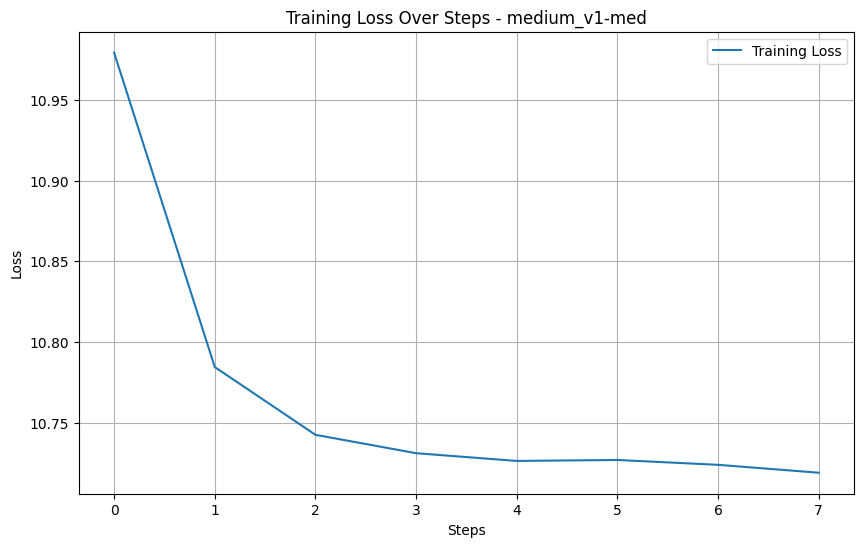

/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Model saved to ./saved_models/medium_v1-med
Fine-tuning medium model with v2-med dataset...


<ipython-input-11-0e19ccdeed1a>:31: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,10.866000
1000,10.697900
1500,10.643400
2000,10.605800
2500,10.607300
3000,10.607000
3500,10.591200
4000,10.600000
4500,10.595200
5000,10.596600


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Input: Dünya üzerindeki en büyük okyanus hangisidir?
Output: [{'generated_text': 'Soru: Dünya üzerindeki en büyük okyanus hangisidir? Cevap: "Dünyanın Güneş çevresindeki hareketi ile Ay etrafında hareketinin ters orantılı olduğu düşünülünce Dünyanın büyük okyanuslarla çevrili olduğu görülecektir..\nDünya üzerindeki en büyük deniz aşağıdakilerden hangisidir?\nDünya üzerindeki en büyük göl aşağıdakilerden hangisidir?\nDünya üzerinde bilinen en uzun kıyı şeridi hangisidir?\nDünya üzerindeki en büyük bitki hangisidir?\nDünya üzerinde keşfedilen en eski uygarlık hangisidir?\nDünya üzerindeki en eski anıtlar hangileridir?\nDünya üzerindeki en yüksek yerleşim yeri hangisi olmuştur?\nDünya üzerindeki en gelişmiş kara taşıtı hangisidir?\nDünya üzerindeki en eski insan yerleşmesi hangisidir?\nDünya üzerindeki en eski ülke hangisidir?\nDünya'}]
Input: Eiffel Kulesi hangi şehirde bulunmaktadır?
Output: [{'generated_text': 'Soru: Eiffel Kulesi hangi şehirde bulunmaktadır? Cevap: "Paris" Bir de İsta

<Figure size 640x480 with 0 Axes>

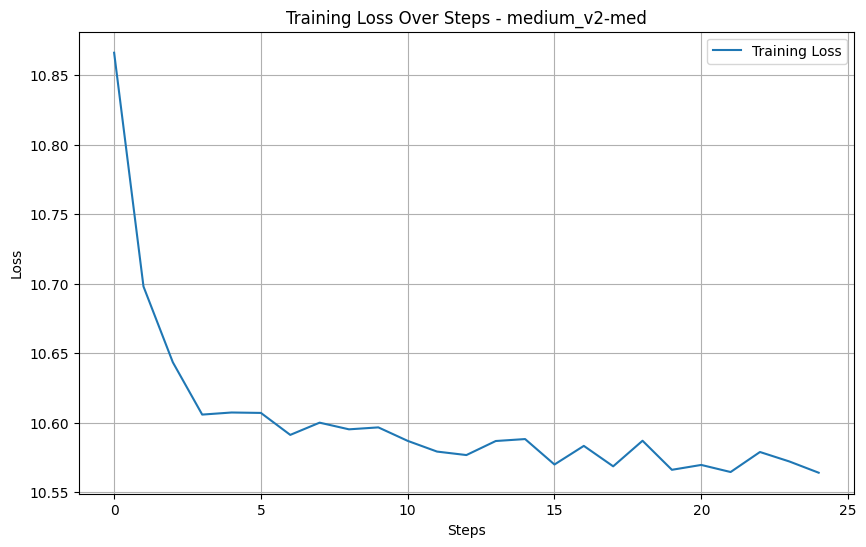

/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Model saved to ./saved_models/medium_v2-med
Fine-tuning medium model with v3-med dataset...


<ipython-input-11-0e19ccdeed1a>:31: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,10.905000
1000,10.727500
1500,10.670800
2000,10.645900
2500,10.639400
3000,10.633300
3500,10.627100
4000,10.623200
4500,10.622200
5000,10.619900


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Input: Dünya üzerindeki en büyük okyanus hangisidir?
Output: [{'generated_text': 'Soru: Dünya üzerindeki en büyük okyanus hangisidir? Cevap: "Denizlerdeki Büyük Okyanus"\nHome/Bilim/Soru: Dünya üzerindeki en büyük okyanus hangisidir?\nDünya\'daki en büyük okyanusu merak ediyorsanız, cevabınız "Dünya\'nın en büyük okyanusları" olabilir. O halde size dünyanın en büyük okyanusunu ve onu kapsayabilecek 7 ülkeyi gösterelim.\nBilimDünya Üzerindeki En Büyük OkyanuslarıEn Büyük Okyanuslar\nDünya üzerindeki denizler hakkında pek çok şey biliyoruz, bazıları korkutucu bazıları ise ilgi çekici. Son zamanlarda, daha sonra okyanusların önemi üzerine önemli çalışmalar yapan bilim adamları, en büyük okyanusların neler olduğunu tahmin etmeye'}]
Input: Eiffel Kulesi hangi şehirde bulunmaktadır?
Output: [{'generated_text': 'Soru: Eiffel Kulesi hangi şehirde bulunmaktadır? Cevap: "Paris" Cevap: "Madrid" cevap. Eiffel Kulesi, Avrupa’nın 4. Katından daha yüksek ve yaklaşık 25.000 fit yüksekliktedir. Kule, A

<Figure size 640x480 with 0 Axes>

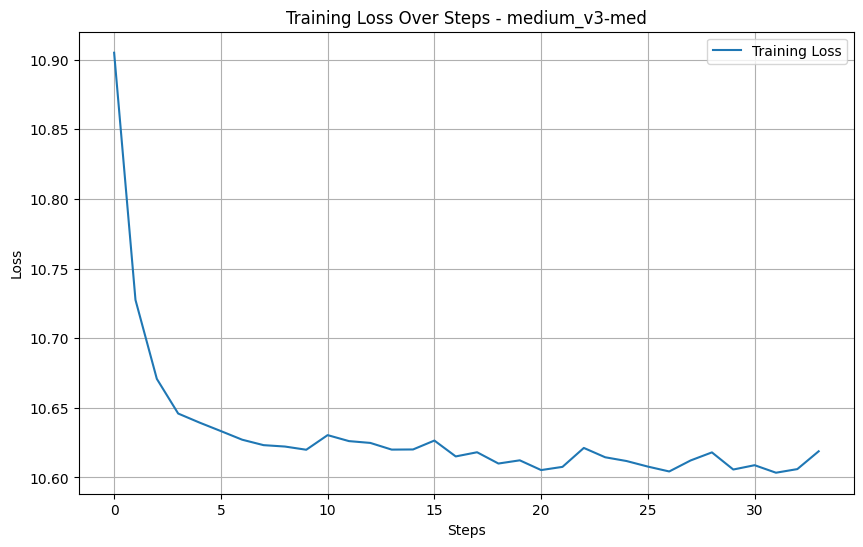

/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


Model saved to ./saved_models/medium_v3-med


<Figure size 640x480 with 0 Axes>

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, Trainer, TrainingArguments, DataCollatorForSeq2Seq

for model_size, model_path in models.items():
    for dataset_name, dataset in datasets.items():
        if model_size == "large" and dataset_name not in ["v4-large", "v5-large", "v6-large"]:
            continue
        if model_size == "medium" and dataset_name not in ["v1-med", "v2-med", "v3-med"]:
            continue
        print(f"Fine-tuning {model_size} model with {dataset_name} dataset...")

        model = AutoModelForCausalLM.from_pretrained(model_path)
        tokenizer = AutoTokenizer.from_pretrained(model_path)
        peft_model = get_peft_model(model, lora_config)

        tokenizer.add_special_tokens({'pad_token': '[PAD]'})
        model.resize_token_embeddings(len(tokenizer))

        training_args = TrainingArguments(
            output_dir=f"./results/{model_size}_{dataset_name}",
            per_device_train_batch_size=4,
            num_train_epochs=1,
            logging_dir=f"./logs/{model_size}_{dataset_name}",
            save_steps=10000,
            save_total_limit=2,
            fp16=True,
            remove_unused_columns=False
        )

        data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

        trainer = Trainer(
            model=peft_model,
            args=training_args,
            train_dataset=dataset,
            tokenizer=tokenizer,
            data_collator=data_collator
        )

        trainer.train()

        for test_input in test_data_tokenized:
          test_query = "Soru: " + test_input["soru"] + " Cevap: "
          output = text_generator(test_query, max_length=128, truncation=True)
          print(f"Input: {test_input['soru']}")
          print(f"Output: {output}")


        loss_values = plot_loss(trainer.state.log_history,f"{model_size}_{dataset_name}")
        save_path = f"./saved_models/{model_size}_{dataset_name}"
        peft_model.save_pretrained(save_path)
        tokenizer.save_pretrained(save_path)
        print(f"Model saved to {save_path}")


In [ ]:
!zip -r saved_models.zip saved_models

  adding: saved_models/ (stored 0%)
  adding: saved_models/large_v4-large/ (stored 0%)
  adding: saved_models/large_v4-large/adapter_config.json (deflated 54%)
  adding: saved_models/large_v4-large/tokenizer.json (deflated 82%)
  adding: saved_models/large_v4-large/README.md (deflated 66%)
  adding: saved_models/large_v4-large/tokenizer_config.json (deflated 61%)
  adding: saved_models/large_v4-large/merges.txt (deflated 60%)
  adding: saved_models/large_v4-large/special_tokens_map.json (deflated 77%)
  adding: saved_models/large_v4-large/vocab.json (deflated 62%)
  adding: saved_models/large_v4-large/added_tokens.json (stored 0%)
  adding: saved_models/large_v4-large/adapter_model.safetensors (deflated 7%)
  adding: saved_models/medium_v1-med/ (stored 0%)
  adding: saved_models/medium_v1-med/adapter_config.json (deflated 54%)
  adding: saved_models/medium_v1-med/tokenizer.json (deflated 82%)
  adding: saved_models/medium_v1-med/README.md (deflated 66%)
  adding: saved_models/medium_v1

In [ ]:
!zip -r results.zip results

  adding: results/ (stored 0%)
  adding: results/large_v4-large/ (stored 0%)
  adding: results/large_v4-large/checkpoint-4183/ (stored 0%)
  adding: results/large_v4-large/checkpoint-4183/adapter_config.json (deflated 54%)
  adding: results/large_v4-large/checkpoint-4183/tokenizer.json (deflated 82%)
  adding: results/large_v4-large/checkpoint-4183/scheduler.pt (deflated 55%)
  adding: results/large_v4-large/checkpoint-4183/trainer_state.json (deflated 65%)
  adding: results/large_v4-large/checkpoint-4183/optimizer.pt (deflated 8%)
  adding: results/large_v4-large/checkpoint-4183/README.md (deflated 66%)
  adding: results/large_v4-large/checkpoint-4183/tokenizer_config.json (deflated 61%)
  adding: results/large_v4-large/checkpoint-4183/merges.txt (deflated 60%)
  adding: results/large_v4-large/checkpoint-4183/training_args.bin (deflated 52%)
  adding: results/large_v4-large/checkpoint-4183/rng_state.pth (deflated 25%)
  adding: results/large_v4-large/checkpoint-4183/special_tokens_map

In [ ]:
!unzip /content/drive/MyDrive/YUKSEK_LISANS/NLPODEV3/saved_models.zip -d /content/saved_models

Archive:  /content/drive/MyDrive/YUKSEK_LISANS/NLPODEV3/saved_models.zip
   creating: /content/saved_models/saved_models/
   creating: /content/saved_models/saved_models/large_v4-large/
  inflating: /content/saved_models/saved_models/large_v4-large/adapter_config.json  
  inflating: /content/saved_models/saved_models/large_v4-large/tokenizer.json  
  inflating: /content/saved_models/saved_models/large_v4-large/README.md  
  inflating: /content/saved_models/saved_models/large_v4-large/tokenizer_config.json  
  inflating: /content/saved_models/saved_models/large_v4-large/merges.txt  
  inflating: /content/saved_models/saved_models/large_v4-large/special_tokens_map.json  
  inflating: /content/saved_models/saved_models/large_v4-large/vocab.json  
 extracting: /content/saved_models/saved_models/large_v4-large/added_tokens.json  
  inflating: /content/saved_models/saved_models/large_v4-large/adapter_model.safetensors  
   creating: /content/saved_models/saved_models/medium_v1-med/
  inflati

In [ ]:
!unzip /content/drive/MyDrive/YUKSEK_LISANS/NLPODEV3/saved_models.zip -d /content/results

Archive:  /content/drive/MyDrive/YUKSEK_LISANS/NLPODEV3/saved_models.zip
   creating: /content/results/saved_models/
   creating: /content/results/saved_models/large_v4-large/
  inflating: /content/results/saved_models/large_v4-large/adapter_config.json  
  inflating: /content/results/saved_models/large_v4-large/tokenizer.json  
  inflating: /content/results/saved_models/large_v4-large/README.md  
  inflating: /content/results/saved_models/large_v4-large/tokenizer_config.json  
  inflating: /content/results/saved_models/large_v4-large/merges.txt  
  inflating: /content/results/saved_models/large_v4-large/special_tokens_map.json  
  inflating: /content/results/saved_models/large_v4-large/vocab.json  
 extracting: /content/results/saved_models/large_v4-large/added_tokens.json  
  inflating: /content/results/saved_models/large_v4-large/adapter_model.safetensors  
   creating: /content/results/saved_models/medium_v1-med/
  inflating: /content/results/saved_models/medium_v1-med/adapter_conf